In [1]:
from reader import *
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os
from scipy import misc
import pickle

from cfgs.config import cfg

plt.rcParams['figure.figsize'] = [10, 10]

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
img_ids = [262145, 262146, 262148, 524297, 349527, 262161, 524311, 524314, 262171, 524317, 262175, 524320, 218459, 262191, 49, 524338, 262197, 262200, 262207, 262221, 524366, 262229, 86, 262235, 262239, 262242, 110, 113, 262260, 226959, 568000, 262275, 524420, 136, 262286, 524436, 262299, 524450, 165, 524459, 524470, 262334, 262335, 192, 524486, 262353, 393251, 36, 524507, 524522]
img_id = img_ids[0]
img_path = os.path.join(cfg.train_images_dir, '%012d.jpg' % img_id)
mask_miss_path = os.path.join(cfg.train_masks_dir, "mask_miss_%012d.png" % img_id)
mask_all_path = os.path.join(cfg.train_masks_dir, "mask_all_%012d.png" % img_id)
label_path = os.path.join(cfg.train_labels_dir, "label_%012d" % img_id)

In [7]:
img = misc.imread(img_path)
mask_miss = misc.imread(mask_miss_path, 0)
mask_all = misc.imread(mask_all_path, 0)
f = open(label_path, 'rb')
label = pickle.load(f)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
img_path

'coco/train2017/000000262145.jpg'

In [9]:
label

[{'bbox': [387, 71.1, 145, 322], 'joint': array([[407. , 115. ,   0. ],
         [446. , 114.5,   1. ],
         [457. , 105. ,   1. ],
         [447. , 182. ,   1. ],
         [419. , 213. ,   1. ],
         [435. , 124. ,   1. ],
         [428. , 187. ,   1. ],
         [404. , 210. ,   1. ],
         [515. , 213. ,   1. ],
         [487. , 297. ,   1. ],
         [486. , 374. ,   1. ],
         [488. , 222. ,   1. ],
         [471. , 293. ,   1. ],
         [462. , 372. ,   0. ],
         [  0. ,   0. ,   3. ],
         [407. , 105. ,   1. ],
         [  0. ,   0. ,   3. ],
         [425. ,  95. ,   1. ]]), 'num_keypoints': 15, 'objpos': [459.5,
   232.1], 'scale_provided': 0.875, 'segment_area': 21258},
 {'bbox': [282.37, 86.79, 32.16, 97.02], 'joint': array([[287. ,  99. ,   1. ],
         [294. , 105.5,   1. ],
         [286. , 106. ,   1. ],
         [  0. ,   0. ,   3. ],
         [  0. ,   0. ,   3. ],
         [302. , 105. ,   1. ],
         [313. , 116. ,   0. ],
         [ 

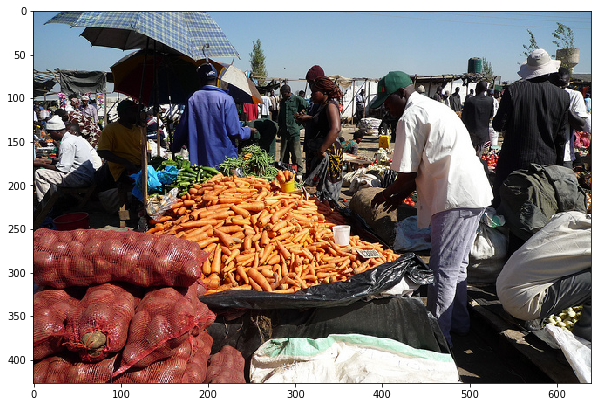

In [10]:
plt.imshow(img)

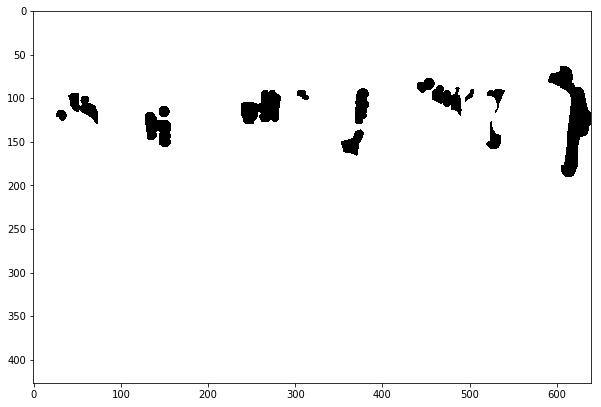

In [11]:
plt.imshow(mask_miss, cmap='gray')

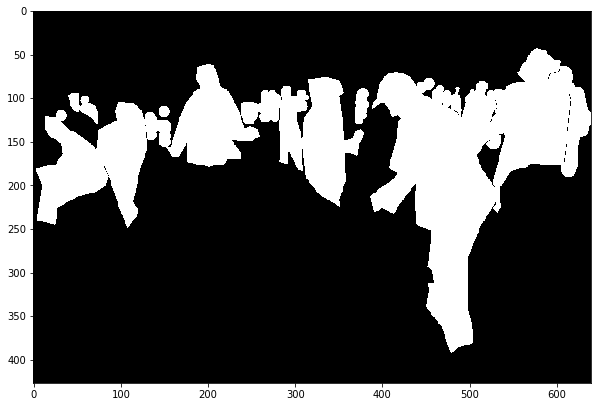

In [12]:
plt.imshow(mask_all, cmap='gray')

In [2]:
dp_list = []
ds = Data('train', False, debug=True)
print(ds.size())

loading annotations into memory...
Done (t=6.34s)
creating index...
index created!
8


In [3]:
ds.reset_state()
g = ds.get_data()
for _ in range(ds.size()):
    dp_list.append(next(g))

In [14]:
dp = dp_list[0]
img, heatmap, paf, mask = dp
img = img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask_shown = cv2.resize(mask, (368, 368), interpolation=cv2.INTER_CUBIC)

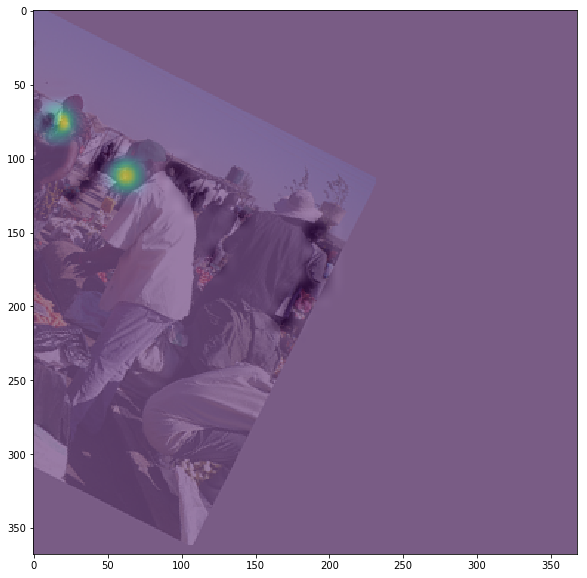

In [15]:
heatmap_shown = cv2.resize(heatmap[:, :, 0], (368, 368), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.imshow(mask_shown, cmap='gray', alpha=0.5)
plt.imshow(heatmap_shown, alpha=0.5)

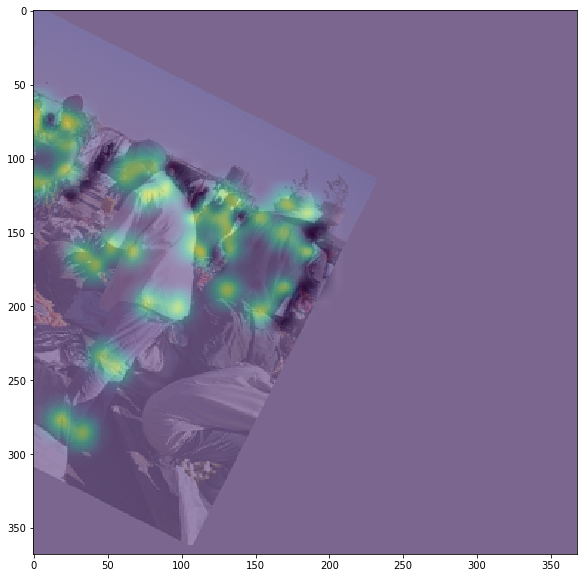

In [16]:
all_heatmap_shown = cv2.resize(np.amax(heatmap[:,:, 0:18], axis=2), (368, 368), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.imshow(mask_shown, cmap='gray', alpha=0.5)
plt.imshow(all_heatmap_shown, alpha=0.5)

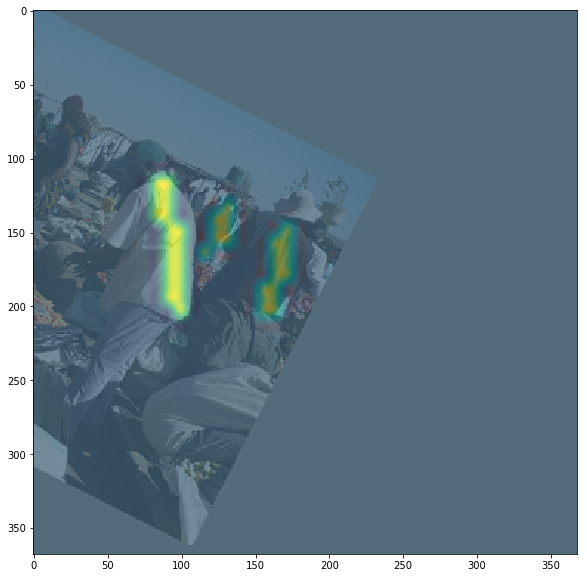

In [20]:
paf_shown_1 = cv2.resize(paf[:, :, 0], (368, 368), interpolation=cv2.INTER_CUBIC)
paf_shown_2 = cv2.resize(paf[:, :, 1], (368, 368), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.imshow(paf_shown_1, alpha=.5)
plt.imshow(paf_shown_2, alpha=.5)